# BoomBikes Case Study

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

**So interpretation is important!**

## Step 1: Reading the Data

Let us first import NumPy and Pandas and read the boombikes dataset

In [1127]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [1128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [1129]:
boombikes = pd.read_csv("day.csv")

In [1130]:
# Check the head of the dataset
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the boombikes dataframe

In [1131]:
boombikes.shape

(730, 16)

In [1132]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1133]:
boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Understanding the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

#### 2.1 Cleaning Data:
As mentioned in the case study, some data require handling in different ways.

The following fields are potentially causing multicollinearity, so avoid confusing the model, we'll drop them:
- Since the sum of `registered` and `casual` is stored in `cnt`, so to avoid multicollinearity, it'll drop both columns
- The field `atemp` and `temp` will confuse the model. In reality, people would make decisions based on the real feel of the weather, so `temp` is to be dropped.

Other unnecessary fields are dropped for the reasons mentioned below:
- The field `instant` is irrilevant to the data analysis, it's just a numeric counter for instances.
- The field `dteday` is already represented in `mnth` and `yr` more efficiently, so to avoid confusion, it'll be dropped.
- The field `workingday` can be dropped as it's represented as `0` if `weekday` is `0` or `6`.


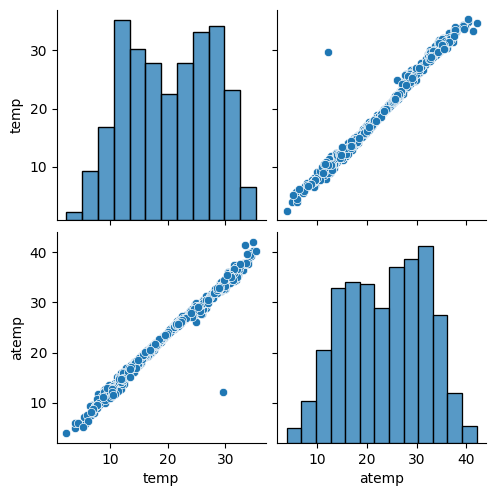

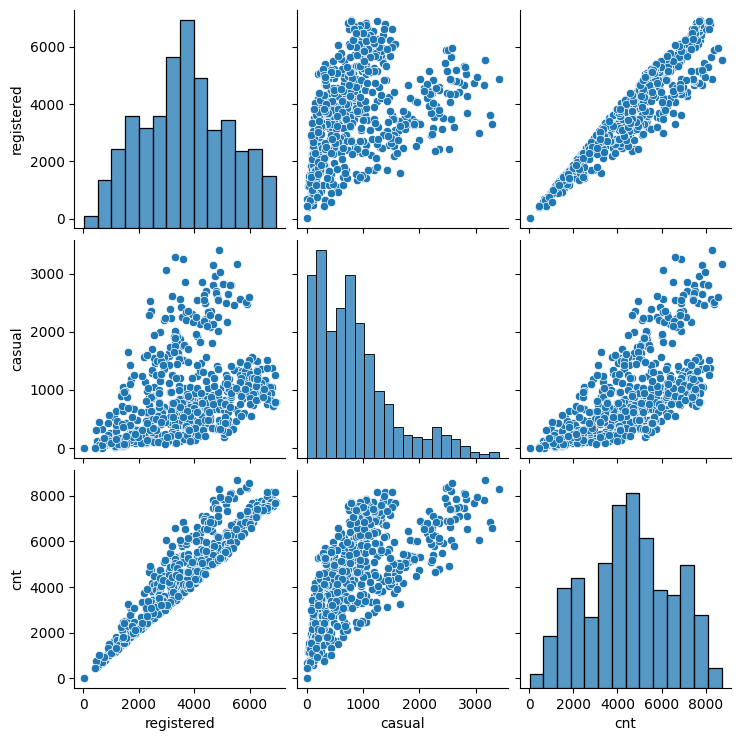

In [1134]:
# Validating the above assumptions by plotting some graphs
sns.pairplot(data=boombikes, vars=['temp','atemp'])
plt.show()
sns.pairplot(data=boombikes, vars=['registered','casual','cnt'])
plt.show()


In [1135]:
boombikes = boombikes.drop(columns=['registered','casual','instant','dteday','temp','workingday'], axis=1)

In [1136]:
# Read the data again
boombikes.head()

,season,yr,mnth,holiday,weekday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,11.46350,43.6957,12.522300,1600


In [1137]:
boombikes.shape

(730, 10)

#### 2.2 Enhance Readability
For the rest of the columns, we'll rename some fields to enhance the readability (e.g.: mnth to month, yr to year, and so on)

In [1138]:
boombikes = boombikes.rename(columns={'yr':'year','mnth':'month','hum':'humidity','cnt':'count','atemp':'realfeel'})

In [1139]:
boombikes.head()

,season,year,month,holiday,weekday,weathersit,realfeel,humidity,windspeed,count
0,1,0,1,0,6,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,11.46350,43.6957,12.522300,1600


Next, we'll map some the categorial variables to their corresponding string values

In [1140]:
varSeason = ['season']
# Defining the map function
def binary_map(x):
    return x.map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

boombikes[varSeason] = boombikes[varSeason].apply(binary_map)

In [1141]:
varMonth = ['month']
def binary_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                  7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

boombikes[varMonth] = boombikes[varMonth].apply(binary_map)

In [1142]:
varWeekday = ['weekday']
# Defining the map function
def binary_map(x):
    return x.map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'})

boombikes[varWeekday] = boombikes[varWeekday].apply(binary_map)

In [1143]:
varWeathersit = ['weathersit']
# Defining the map function
def binary_map(x):
    return x.map({1: 'Clear', 2: 'Mist', 3: 'LightSnow', 4: 'HeavyRain'})

boombikes[varWeathersit] = boombikes[varWeathersit].apply(binary_map)

## Step 3: Visualising Data

Now, we'll start visualizing data using plots and heatmaps to understand the correlation between variables

In [1144]:
boombikes.head()

,season,year,month,holiday,weekday,weathersit,realfeel,humidity,windspeed,count
0,spring,0,Jan,0,Saturday,Mist,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,Mist,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,Clear,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,Clear,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,Clear,11.46350,43.6957,12.522300,1600


# Start with pairplotting the numeric values

sns.pairplot(data=boombikes, vars=['count','realfeel','humidity','windspeed'])
plt.show()

**Observation:** The total `count` of users is highly impacted by the realfeel of `atemp`.

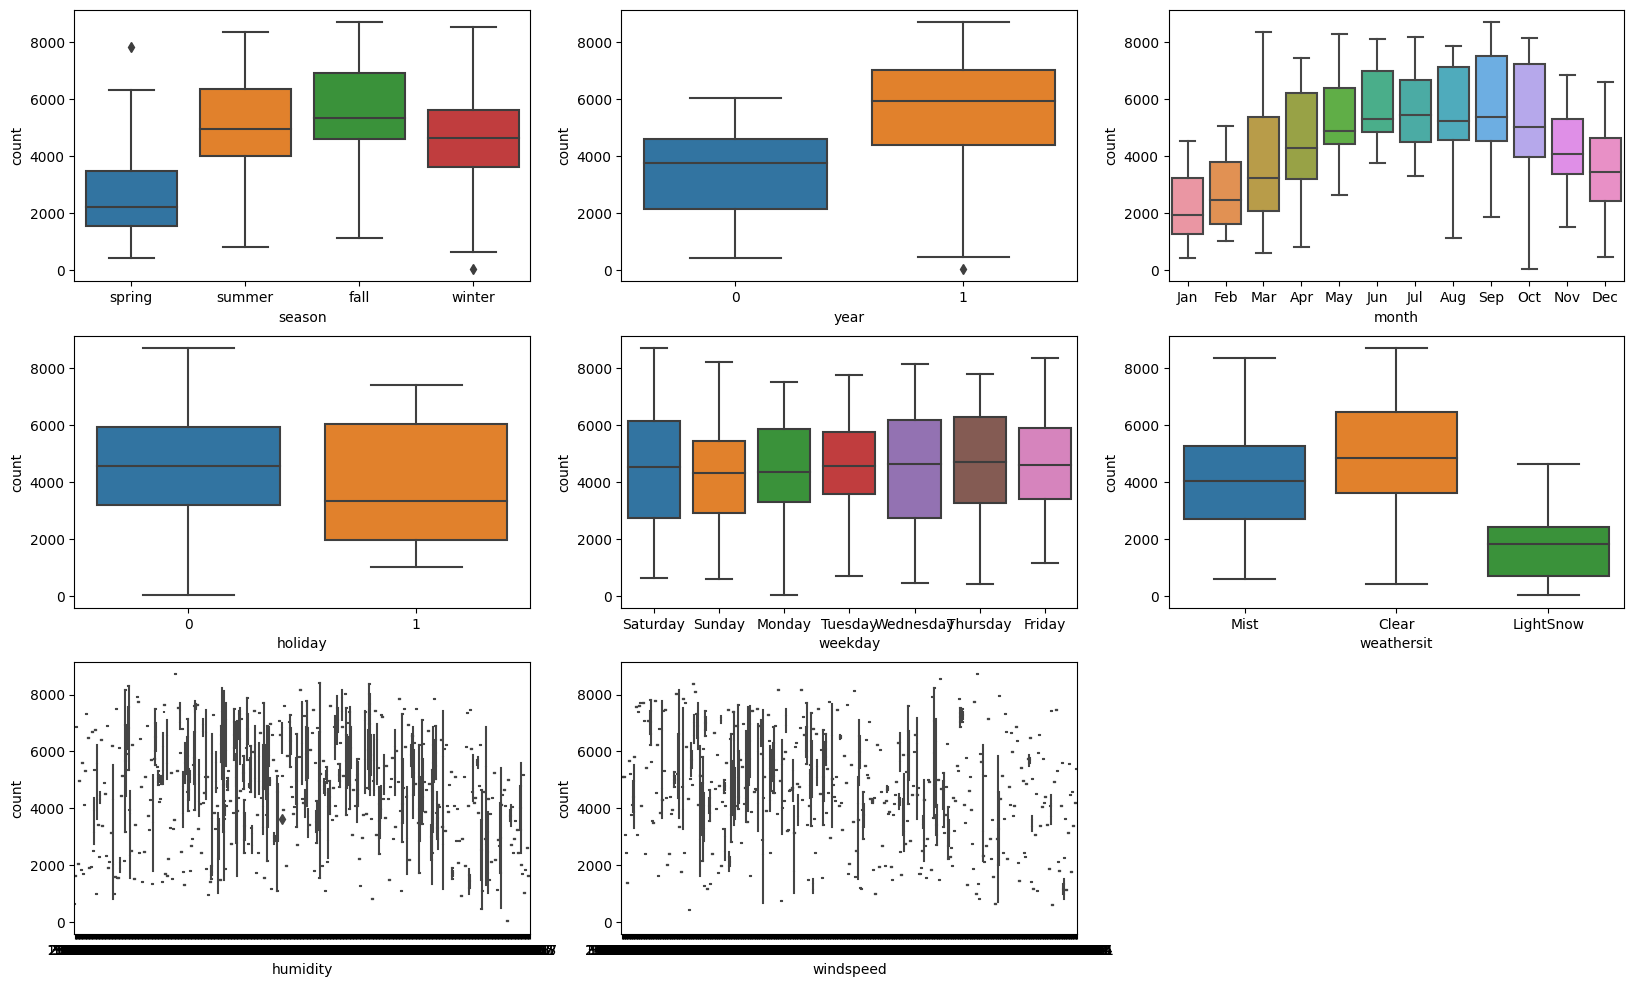

In [1145]:
# Next, boxplotting categorical variables

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'count', data = boombikes)
plt.subplot(3,3,2)
sns.boxplot(x = 'year', y = 'count', data = boombikes)
plt.subplot(3,3,3)
sns.boxplot(x = 'month', y = 'count', data = boombikes)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'count', data = boombikes)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'count', data = boombikes)
plt.subplot(3,3,6)
sns.boxplot(x = 'weathersit', y = 'count', data = boombikes)
plt.subplot(3,3,7)
sns.boxplot(x = 'humidity', y = 'count', data = boombikes)
plt.subplot(3,3,8)
sns.boxplot(x = 'windspeed', y = 'count', data = boombikes)
plt.show()

**Observations:**
- There's a huge increase in rentals in `2019`.
- The `fall` season of `2019` is the highest, followed by the `summer`.
- The `spring` season in both years shows very low rent rates.
- Rentals across the week is consistent, people are renting bikes during `holiday` and `weekdays`.
- There's no single day representing `HeavyRain` in the dataset.
- The fields `atemp`, `humidity`, and `windspeed` need further handling (scaling) to be readable, which will be done after splitting data into train and test sets.

We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `year` and `count` with `season` as the hue.

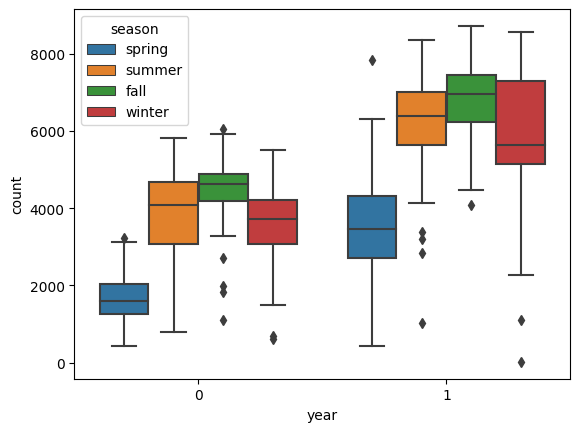

In [1149]:
#plt.figure(figsize = (10, 5))
sns.boxplot(x = 'year', y = 'count', hue = 'season', data = boombikes)
plt.show()

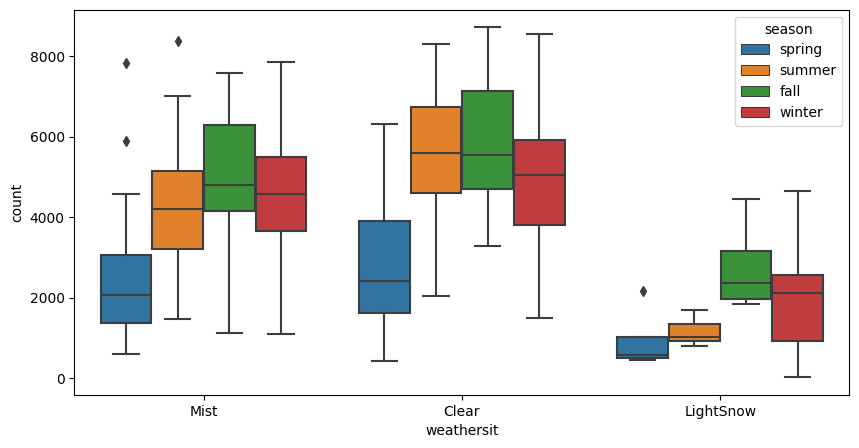

In [1150]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weathersit', y = 'count', hue = 'season', data = boombikes)
plt.show()

**Observations:** 
- The rents across all seasons are much higher in `2019`.
- Still the `spring` season is the lowest by far, but the `winter` season is showing higher interest in `2019` compared to `2018`.

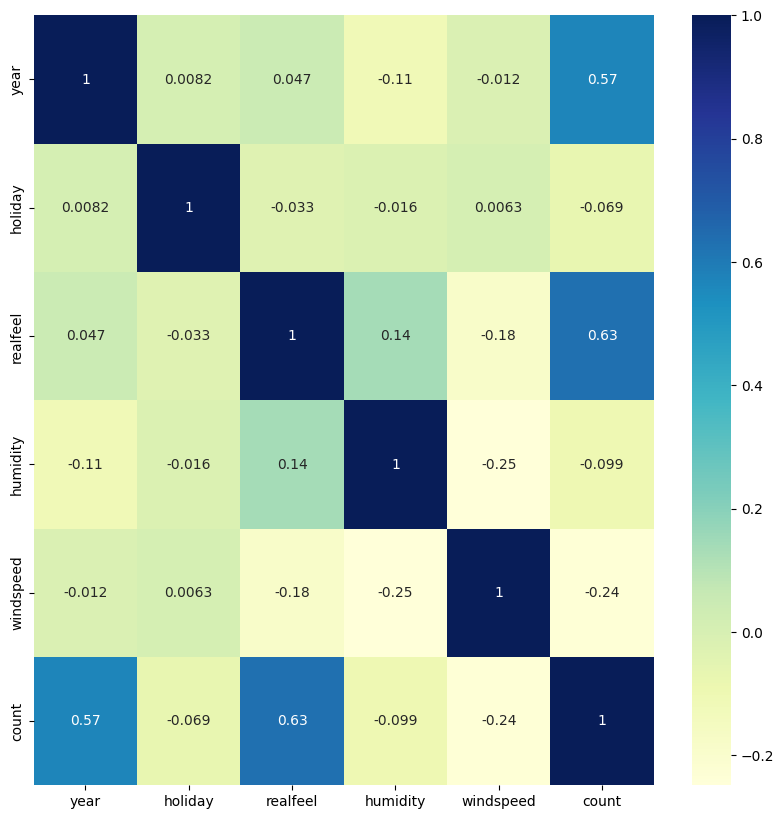

In [1151]:
# Checking for correlation between variables
plt.figure(figsize=(10,10))
sns.heatmap(boombikes.corr(), annot = True, cmap = "YlGnBu")
plt.show()

**Observations:**
- Across all numerical variables, `atemp` (aka `realfeel`) has the highest correlation with `count`, followed by `year`.
- This is not enough at all to build the model, since the categorical variables are not yet converted into dummy numerical variables to understand their imapct.

## Step 4: Data Preparation

### Dummy Variables

The categorical variables `month`, `season`, `weekday` and `weathersit` need to have dummy variables out of them to realisticly visualize their components, and understand their impact.

In [1063]:
# Get the dummy variables for the features/categorical variables below
# We'll handle 'season' separately
dummy = boombikes[['month','season','weekday','weathersit']]
dummy = pd.get_dummies(dummy, drop_first=True)

In [1064]:
# Adding the new dummy variables to the BoomBikes data set
boombikes = pd.concat([dummy, boombikes], axis=1)

Regarding getting dummy variables for the feature `season`, since we know from the previous visuals that `fall` has the highest rental rate, it's not preferred to use `drop_first` to avoid dropping `fall`, so we'll purposefully drop `spring` as being of a least impact.

In [1065]:
# Check what the new dataset looks like
boombikes.shape

(730, 32)

In [1066]:
boombikes.columns

Index(['month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul',
       'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct',
       'month_Sep', 'season_spring', 'season_summer', 'season_winter',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weathersit_LightSnow', 'weathersit_Mist', 'season', 'year', 'month',
       'holiday', 'weekday', 'weathersit', 'realfeel', 'humidity', 'windspeed',
       'count'],
      dtype='object')

The `drop_first` is helpful to apply the rule `(n-1)` for the needed number of dummy variables:

- `fall` is dropped as being `0` in all other `seasons` columns
- `Apr` is dropped as being `0` in all other `months` columns
- `Friday` is dropped as being `0` in all other `weekdays` columns
- `HeavyRain` has no existence in the data set, so it was dropped automatically.
- `Clear` is dropped as being `0` in all other `weathersits` columns

In [1067]:
# Now let's see the head of our dataframe.

boombikes.head()

,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,...,season,year,month,holiday,weekday,weathersit,realfeel,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,spring,0,Jan,0,Saturday,Mist,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,spring,0,Jan,0,Sunday,Mist,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,spring,0,Jan,0,Monday,Clear,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,spring,0,Jan,0,Tuesday,Clear,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,spring,0,Jan,0,Wednesday,Clear,11.46350,43.6957,12.522300,1600


In [1068]:
# Drop the columns which dummy variables were created against
# Dropping 'month', 'season','weekday','weathersit'
boombikes = boombikes.drop(['month', 'season','weekday','weathersit'], axis=1)

In [1069]:
# Check what the new dataset looks like
boombikes.shape

(730, 28)

In [1070]:
boombikes.head()

,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,...,weekday_Tuesday,weekday_Wednesday,weathersit_LightSnow,weathersit_Mist,year,holiday,realfeel,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,11.46350,43.6957,12.522300,1600


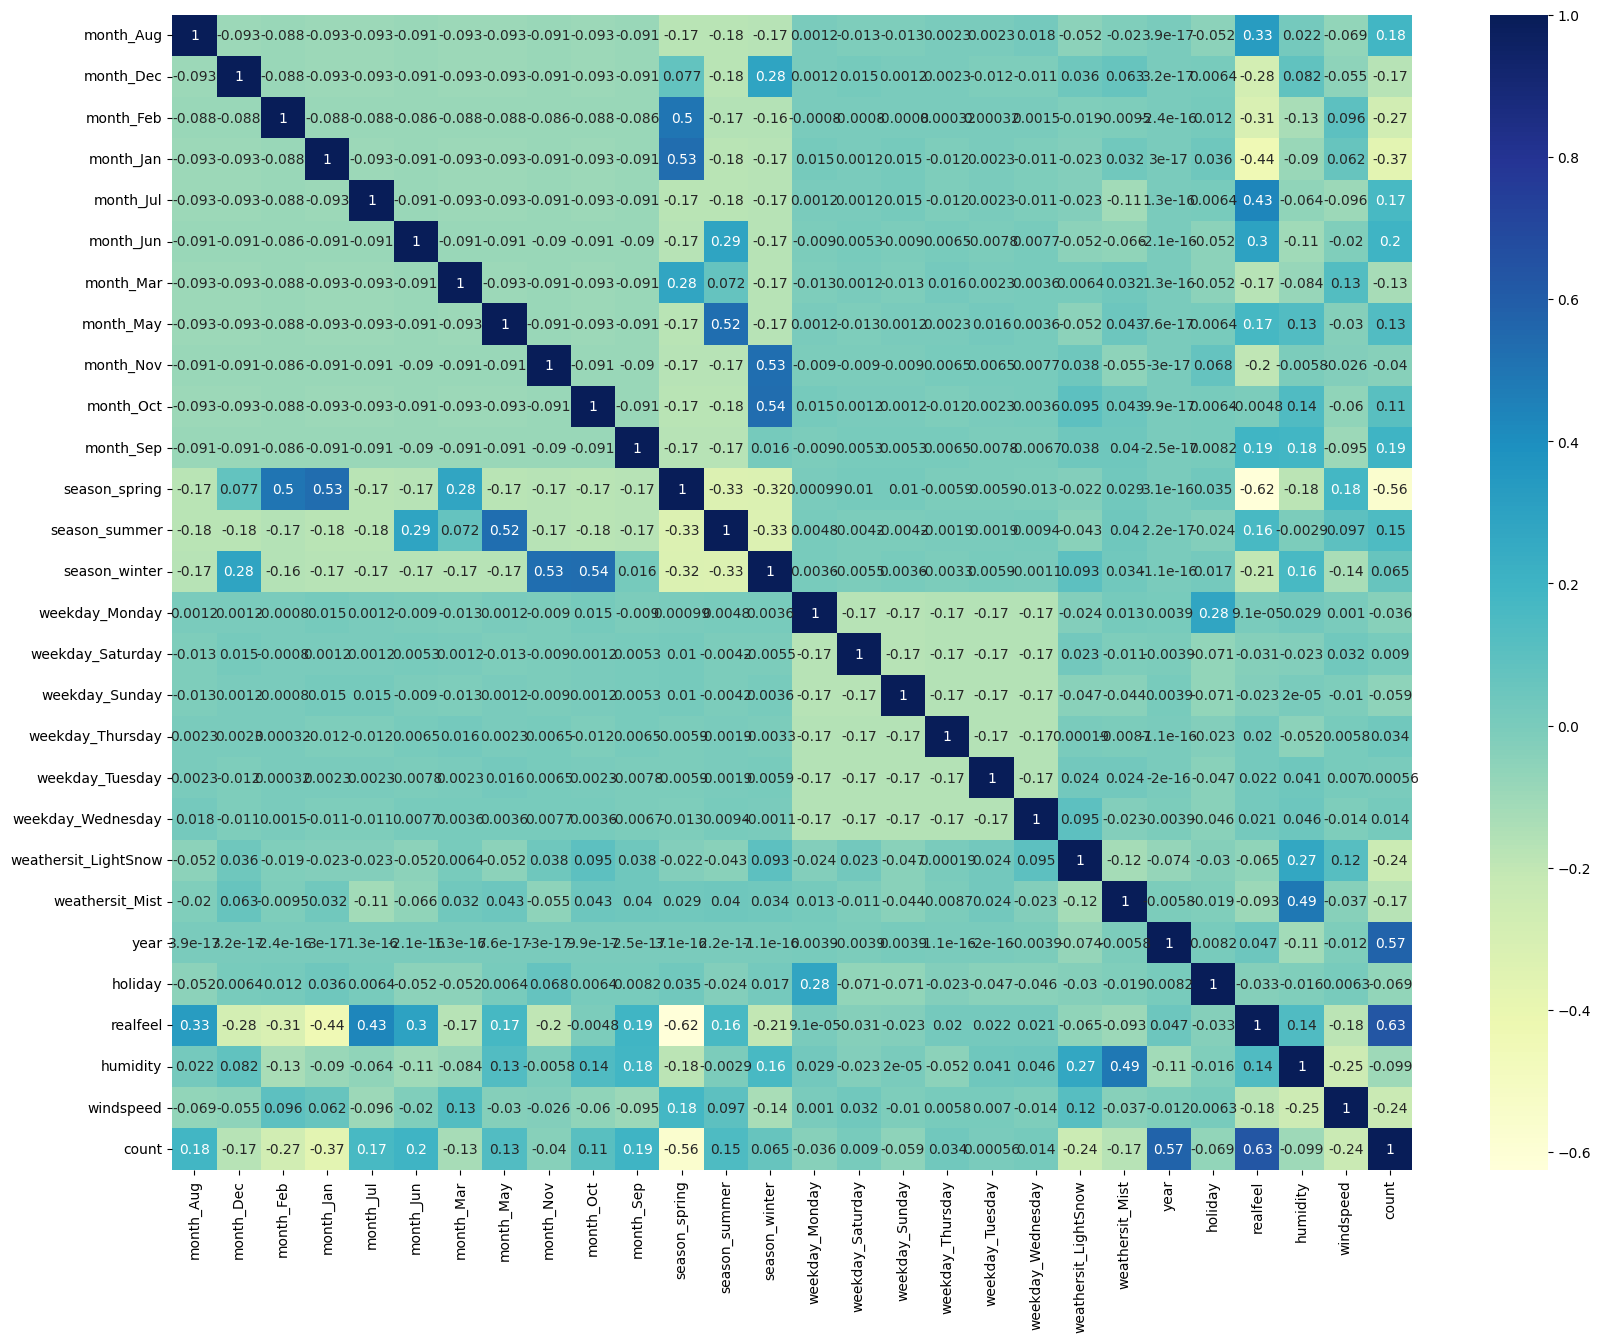

In [1071]:
# Re-draw the heatmap with the new derived variables
plt.figure(figsize=(20,15))
sns.heatmap(boombikes.corr(), annot = True, cmap = "YlGnBu")
plt.show()

**Observations:**
- Still `realfeel` is the highest correlated variable with `count`.
- The field `year` comes in next in correlation.
- Months of `Jun`, `Jul`, `Aug` and `Sep` are of the highest correlation across `months`.
- The season `fall` has the highest correlation with `count`, followed by `summer`.


## Step 5: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [1072]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(boombikes, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling Features

We'll be using MinMax scaling.

In [1073]:
scaler = MinMaxScaler()

In [1074]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

numerics = ['float16', 'float32', 'float64','int64']
boombikes.select_dtypes(include=numerics)

,year,holiday,realfeel,humidity,windspeed,count
0,0,0,18.18125,80.5833,10.749882,985
1,0,0,17.68695,69.6087,16.652113,801
2,0,0,9.47025,43.7273,16.636703,1349
3,0,0,10.60610,59.0435,10.739832,1562
4,0,0,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...
725,1,0,11.33210,65.2917,23.458911,2114
726,1,0,12.75230,59.0000,10.416557,3095
727,1,0,12.12000,75.2917,8.333661,1341
728,1,0,11.58500,48.3333,23.500518,1796


In [1075]:
num_vars = ['count','realfeel','humidity','windspeed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [1076]:
df_train.head()

,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,...,weekday_Tuesday,weekday_Wednesday,weathersit_LightSnow,weathersit_Mist,year,holiday,realfeel,humidity,windspeed,count
653,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0.766351,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0.438975,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0.200348,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0.391735,0.504508,0.188475,0.482973


In [1077]:
df_train.describe()

,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,...,weekday_Tuesday,weekday_Wednesday,weathersit_LightSnow,weathersit_Mist,year,holiday,realfeel,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,...,0.131373,0.158824,0.029412,0.343137,0.507843,0.025490,0.512989,0.650369,0.320768,0.513620
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,...,0.338139,0.365870,0.169124,0.475223,0.500429,0.157763,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


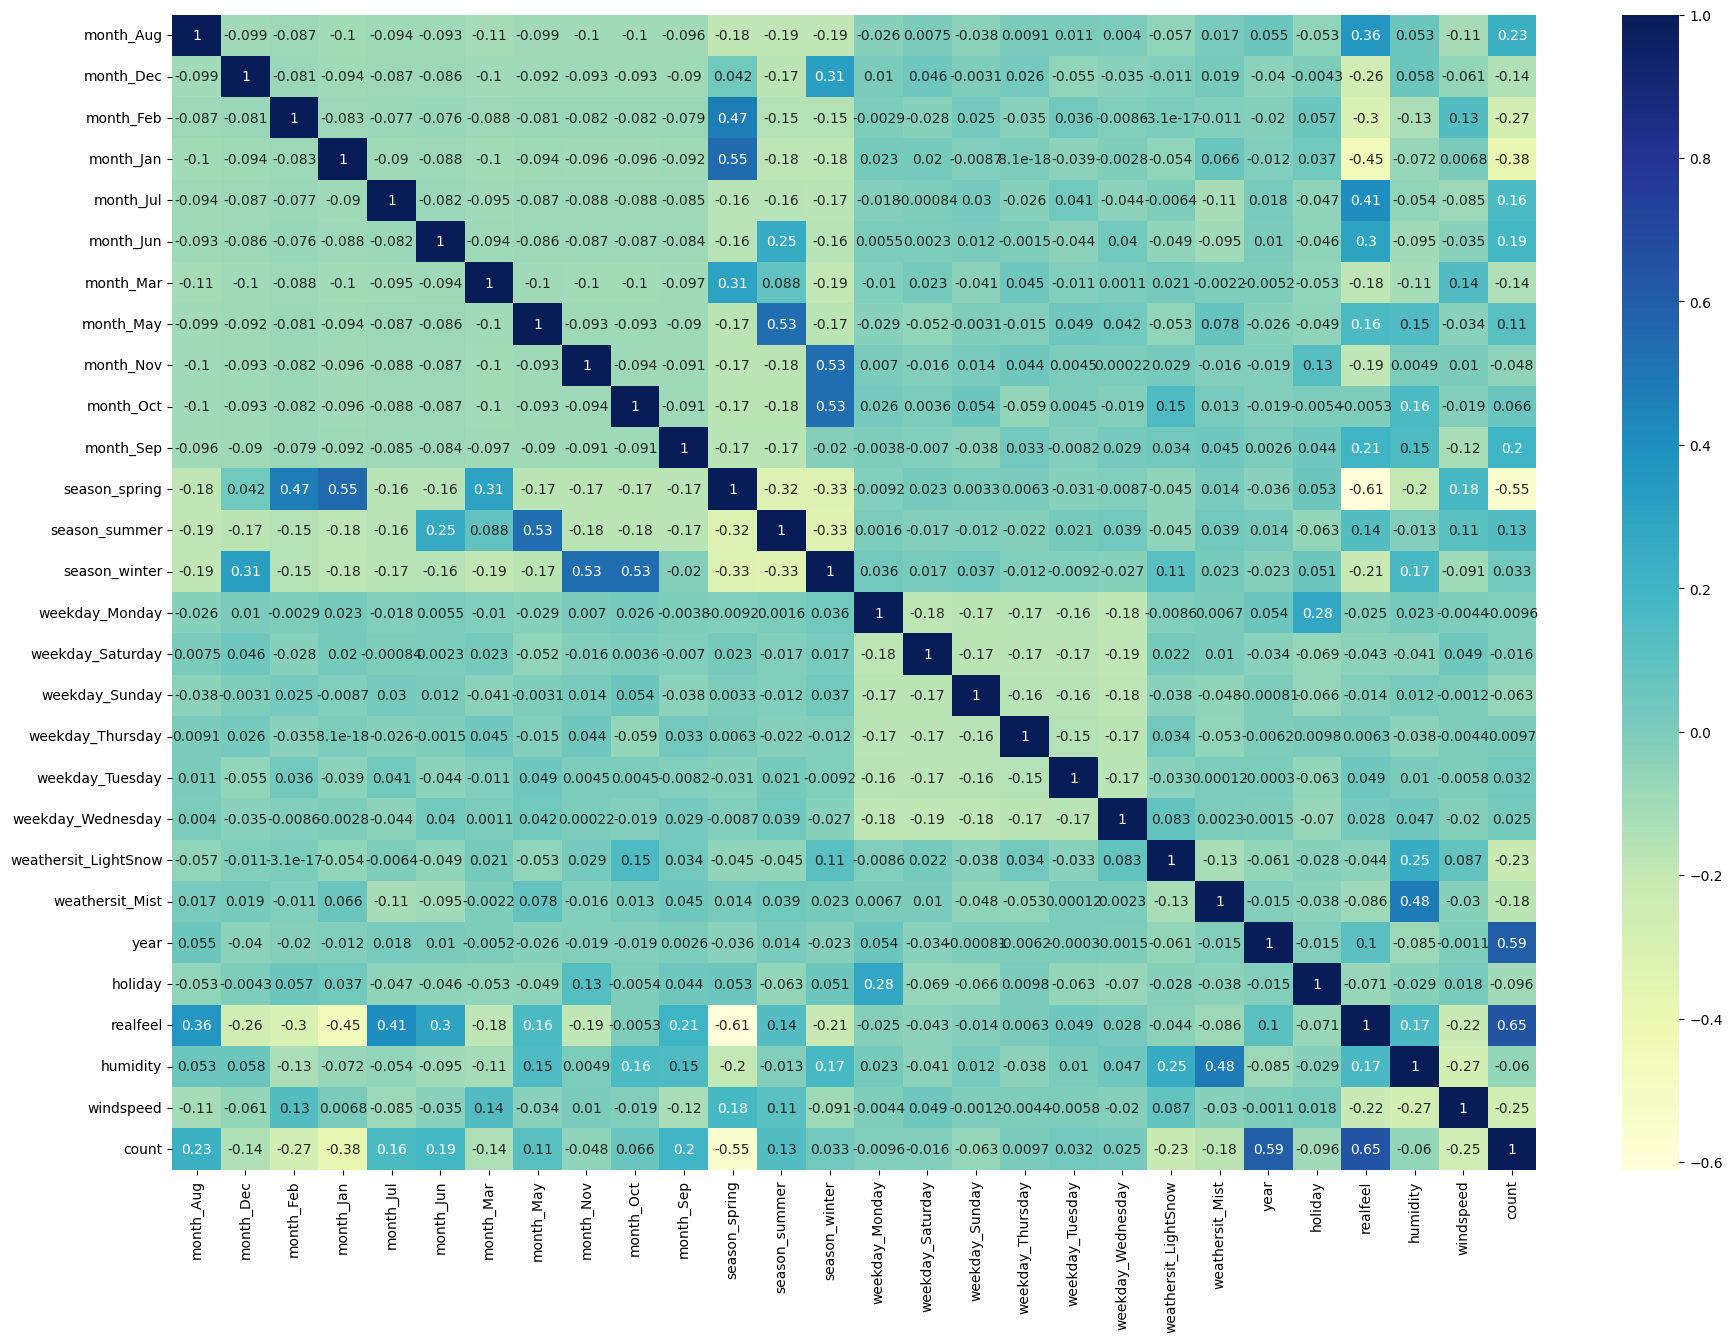

In [1078]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (22, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [1079]:
y_train = df_train.pop('count')
X_train = df_train

In [1080]:
X_train.head()

,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,...,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_LightSnow,weathersit_Mist,year,holiday,realfeel,humidity,windspeed
653,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0.501133,0.575354,0.300794
576,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0.766351,0.725633,0.264686
426,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0.438975,0.640189,0.255342
728,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0.200348,0.498067,0.663106
482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0.391735,0.504508,0.188475


In [1081]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: count, dtype: float64

## Step 6: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [1082]:
# Running RFE with all the output of 10 variables
lm = LinearRegression()
lm.fit(X_train,y_train)

# Running RFE
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [1083]:
# List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('month_Aug', False, 5),
 ('month_Dec', True, 1),
 ('month_Feb', False, 2),
 ('month_Jan', True, 1),
 ('month_Jul', True, 1),
 ('month_Jun', False, 6),
 ('month_Mar', False, 13),
 ('month_May', False, 3),
 ('month_Nov', True, 1),
 ('month_Oct', False, 10),
 ('month_Sep', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 4),
 ('season_winter', True, 1),
 ('weekday_Monday', False, 7),
 ('weekday_Saturday', False, 12),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 9),
 ('weekday_Tuesday', False, 8),
 ('weekday_Wednesday', False, 11),
 ('weathersit_LightSnow', True, 1),
 ('weathersit_Mist', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('realfeel', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [1084]:
# Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['month_Dec', 'month_Jan', 'month_Jul', 'month_Nov', 'month_Sep',
       'season_spring', 'season_winter', 'weekday_Sunday',
       'weathersit_LightSnow', 'weathersit_Mist', 'year', 'holiday',
       'realfeel', 'humidity', 'windspeed'],
      dtype='object')

In [1085]:
# Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['month_Aug', 'month_Feb', 'month_Jun', 'month_Mar', 'month_May',
       'month_Oct', 'season_summer', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [1086]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [1087]:
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   const                 510 non-null    float64
 1   month_Dec             510 non-null    uint8  
 2   month_Jan             510 non-null    uint8  
 3   month_Jul             510 non-null    uint8  
 4   month_Nov             510 non-null    uint8  
 5   month_Sep             510 non-null    uint8  
 6   season_spring         510 non-null    uint8  
 7   season_winter         510 non-null    uint8  
 8   weekday_Sunday        510 non-null    uint8  
 9   weathersit_LightSnow  510 non-null    uint8  
 10  weathersit_Mist       510 non-null    uint8  
 11  year                  510 non-null    int64  
 12  holiday               510 non-null    int64  
 13  realfeel              510 non-null    float64
 14  humidity              510 non-null    float64
 15  windspeed             

In [1088]:
# Building the model
lm = sm.OLS(y_train,X_train_rfe.astype(float)).fit()

In [1089]:
lm.params

const                   0.373214
month_Dec              -0.050219
month_Jan              -0.052746
month_Jul              -0.064513
month_Nov              -0.051845
month_Sep               0.057258
season_spring          -0.106271
season_winter           0.068824
weekday_Sunday         -0.046933
weathersit_LightSnow   -0.257621
weathersit_Mist        -0.061331
year                    0.232297
holiday                -0.094496
realfeel                0.441749
humidity               -0.139582
windspeed              -0.166033
dtype: float64

In [1090]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     181.3
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          9.23e-190
Time:                        11:20:16   Log-Likelihood:                 516.06
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     494   BIC:                            -932.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3732 

**Observations:**
- Rsq is 0.846, explaining that the selected variables represents 82.6% of the impact on `count`.
- Adj. Rsq is 0.842, which is a good value.
- All the features have almost the same significantly low p-values.

Start with values that has moderate negative coef.

In [1091]:
# Dropping workingday as being with the highest VIF
X_train_new = X_train_rfe.drop(['month_Nov'], axis=1)

In [1092]:
# Adding constant
X_train_lm = sm.add_constant(X_train_new)

# Building the model (3rd run)
lm = sm.OLS(y_train, X_train_new.astype(float)).fit()

In [1093]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     191.0
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          3.30e-189
Time:                        11:20:17   Log-Likelihood:                 511.99
No. Observations:                 510   AIC:                            -994.0
Df Residuals:                     495   BIC:                            -930.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3595 

In [1094]:
# Dropping next feature
X_train_new = X_train_new.drop(['season_spring'], axis=1)

In [1095]:
# Adding constant
X_train_lm = sm.add_constant(X_train_new)

# Building the model (3rd run)
lm = sm.OLS(y_train, X_train_new.astype(float)).fit()

In [1096]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     185.5
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          6.68e-181
Time:                        11:20:17   Log-Likelihood:                 489.47
No. Observations:                 510   AIC:                            -950.9
Df Residuals:                     496   BIC:                            -891.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2695 

In [1097]:
# Run VIF calculation again
vif = pd.DataFrame()
X = X_train_new.astype(float)
vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif.VIF = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
0,const,50.67
11,realfeel,2.25
12,humidity,1.92
8,weathersit_Mist,1.57
2,month_Jan,1.52
5,season_winter,1.32
3,month_Jul,1.30
7,weathersit_LightSnow,1.26
1,month_Dec,1.24
13,windspeed,1.21


In [1098]:
# Dropping next feature
X_train_new = X_train_new.drop(['weekday_Sunday'], axis=1)

# Adding constant
X_train_lm = sm.add_constant(X_train_new)

# Building the model 4th
lm = sm.OLS(y_train,X_train_new.astype(float)).fit()

In [1099]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     194.0
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          9.67e-179
Time:                        11:20:17   Log-Likelihood:                 481.58
No. Observations:                 510   AIC:                            -937.2
Df Residuals:                     497   BIC:                            -882.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2663 

In [1100]:
# Run VIF calculation again
vif = pd.DataFrame()
X = X_train_new.astype(float)
vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif.VIF = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
0,const,50.64
10,realfeel,2.24
11,humidity,1.91
7,weathersit_Mist,1.56
2,month_Jan,1.52
5,season_winter,1.31
3,month_Jul,1.30
6,weathersit_LightSnow,1.25
1,month_Dec,1.24
12,windspeed,1.21


In [1101]:
# Dropping next feature
X_train_new = X_train_new.drop(['weathersit_Mist'], axis=1)

# Adding constant
X_train_lm = sm.add_constant(X_train_new)

# Building the model 4th
lm = sm.OLS(y_train,X_train_new.astype(float)).fit()

In [1102]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     201.4
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          2.29e-175
Time:                        11:20:18   Log-Likelihood:                 470.82
No. Observations:                 510   AIC:                            -917.6
Df Residuals:                     498   BIC:                            -866.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3069 

In [1103]:
# Dropping next feature
X_train_new = X_train_new.drop(['month_Jan'], axis=1)

# Adding constant
X_train_lm = sm.add_constant(X_train_new)

# Building the model 4th
lm = sm.OLS(y_train,X_train_new.astype(float)).fit()

In [1104]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     213.5
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          3.89e-173
Time:                        11:20:18   Log-Likelihood:                 462.75
No. Observations:                 510   AIC:                            -903.5
Df Residuals:                     499   BIC:                            -856.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2668 

In [1105]:
# Dropping next feature
X_train_new = X_train_new.drop(['month_Jul'], axis=1)

# Adding constant
X_train_lm = sm.add_constant(X_train_new)

# Building the model 4th
lm = sm.OLS(y_train,X_train_new.astype(float)).fit()

In [1106]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     226.0
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          6.31e-170
Time:                        11:20:18   Log-Likelihood:                 452.36
No. Observations:                 510   AIC:                            -884.7
Df Residuals:                     500   BIC:                            -842.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2676 

In [1107]:
# Dropping next feature
X_train_new = X_train_new.drop(['month_Dec'], axis=1)

# Adding constant
X_train_lm = sm.add_constant(X_train_new)

# Building the model 4th
lm = sm.OLS(y_train,X_train_new.astype(float)).fit()

In [1108]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     253.9
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          7.60e-171
Time:                        11:20:19   Log-Likelihood:                 451.66
No. Observations:                 510   AIC:                            -885.3
Df Residuals:                     501   BIC:                            -847.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2639 

In [1109]:
# Run VIF calculation again
vif = pd.DataFrame()
X = X_train_new.astype(float)
vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif.VIF = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
0,const,40.41
7,humidity,1.24
6,realfeel,1.20
8,windspeed,1.15
2,season_winter,1.12
3,weathersit_LightSnow,1.11
1,month_Sep,1.07
4,year,1.02
5,holiday,1.01


In [1110]:
# Dropping next feature
X_train_new = X_train_new.drop(['month_Sep'], axis=1)

# Adding constant
X_train_lm = sm.add_constant(X_train_new)

# Building the model 4th
lm = sm.OLS(y_train,X_train_new.astype(float)).fit()

In [1111]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     275.1
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          2.69e-167
Time:                        11:20:19   Log-Likelihood:                 440.41
No. Observations:                 510   AIC:                            -864.8
Df Residuals:                     502   BIC:                            -830.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2532 

In [1112]:
# Run VIF calculation again
vif = pd.DataFrame()
X = X_train_new.astype(float)
vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif.VIF = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
0,const,40.16
6,humidity,1.23
5,realfeel,1.16
7,windspeed,1.15
1,season_winter,1.12
2,weathersit_LightSnow,1.11
3,year,1.02
4,holiday,1.01


In [1113]:
# Dropping next feature
X_train_new = X_train_new.drop(['holiday'], axis=1)

# Adding constant
X_train_lm = sm.add_constant(X_train_new)

# Building the model 4th
lm = sm.OLS(y_train,X_train_new.astype(float)).fit()

In [1114]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     314.4
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          1.27e-166
Time:                        11:20:20   Log-Likelihood:                 435.86
No. Observations:                 510   AIC:                            -857.7
Df Residuals:                     503   BIC:                            -828.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2483 

In [1115]:
# Run VIF calculation again
vif = pd.DataFrame()
X = X_train_new.astype(float)
vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif.VIF = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
0,const,40.03
5,humidity,1.23
4,realfeel,1.16
6,windspeed,1.15
1,season_winter,1.11
2,weathersit_LightSnow,1.10
3,year,1.02


## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [1116]:
y_train_count = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

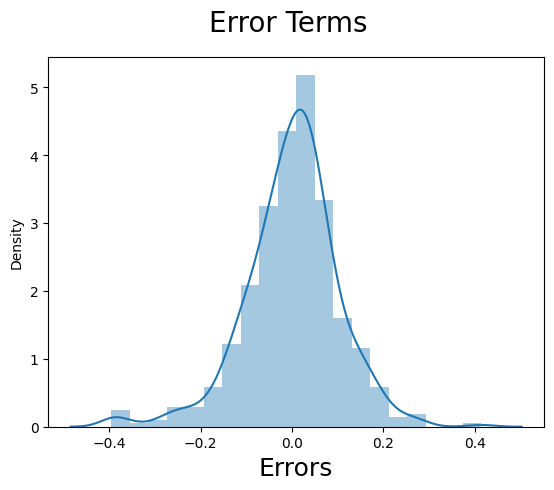

In [1117]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [1118]:
num_vars = ['count','realfeel','humidity','windspeed']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [1119]:
df_test.describe()

,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,...,weekday_Tuesday,weekday_Wednesday,weathersit_LightSnow,weathersit_Mist,year,holiday,realfeel,humidity,windspeed,count
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,...,0.164384,0.100457,0.027397,0.319635,0.479452,0.036530,0.532991,0.638508,0.313350,0.520592
std,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,...,0.371472,0.301297,0.163612,0.467403,0.500722,0.188034,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.549198,0.627737,0.299459,0.524275
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300


#### Dividing into X_test and y_test

In [1120]:
y_test = df_test.pop('count')
X_test = df_test

In [1121]:
# Dropping const
X_train_new = X_train_new.drop(['const'], axis=1)

In [1122]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [1123]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

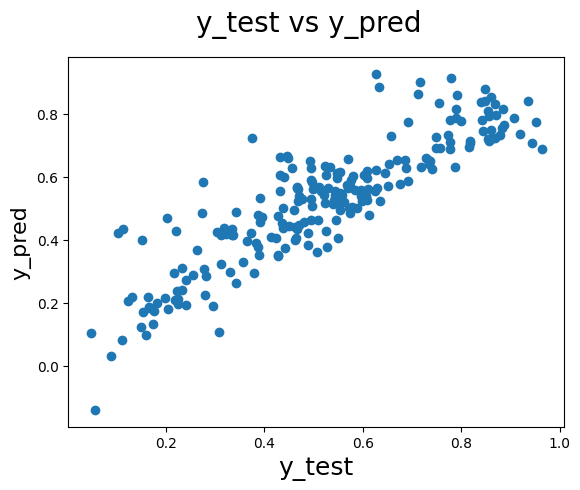

In [1124]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label


We can see that the equation of our best fitted line is:

$ count = 2.84  \times  atemp + 1.93  \times  year + 1.50  \times  seasonSummer + 1.33  \times  seasonWinter + 1.19  \times  monthSep + 1.15  \times  weekdaySunday + 1.05  \times  weathersitLightSnow + 1.03  \times  holiday +  $


In [1125]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7695532883137512

#### Overall we have a great model, since  the r_2 score of the test_set is `76.9%`, which is less than 5% different from the one of the train_set (`78.9%`). 